In [1]:
from pathlib import Path
import dill

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import seaborn as sns

In [2]:
DATAFOLDER = Path("..\\data")
FIGSFOLDER = Path("C:\\Users\\jmc010\\Dropbox\\Publications in Progress\\Roitman_Current Opinion\\figs")
df = pd.read_excel("..\\experiment_info_gsheet.xlsx", sheet_name="Sheet1")

In [3]:
with open(DATAFOLDER / "snips_dict.pickle", "rb") as f:
    snips_dict = dill.load(f)
    
rats = ["SVG130", "SVG132", "SVG134", "SVG135", "SVG137", "SVG139"]

In [4]:
def snips_fig(snips):
    fig, ax = plt.subplots()
    for snip in snips:
        ax.plot(snip, color="black", alpha=0.3)

    ax.plot(np.mean(snips, axis=0))
    
def snips_changing_baseline_fig(snips, highlights=[]):
    fig, ax = plt.subplots()
    for idx, snip in enumerate(snips):
        if idx in highlights:
            ax.plot(snip+idx, color="red", alpha=0.99)
        else:
            ax.plot(snip+idx, color="black", alpha=0.3)

def heatmap(snips):
    fig, ax = plt.subplots()
    sns.heatmap(snips, cmap="Greys", ax=ax, vmin=0, vmax=5)

In [30]:
snips = snips_dict["SVG135_FD"]
highlights = [1, 8, 10, 23, 26]


def make_hp_and_traces_fig(snips, highlights, title="", color="black"):
    f, [[ax1, ax2],
        [ax3, ax4]] = plt.subplots(nrows=2, ncols=2,
                        gridspec_kw={'width_ratios': [20, 1],
                                     "height_ratios": [1, 1.5],
                                    "hspace": 0.2, "wspace": 0.1,
                                    "right": 0.8
                        },
                        figsize=(3, 3),
                        )


    if color == "green":
        cmap = "Greens"
    elif color == "blue":
        cmap = "Blues"
    else:
        cmap = "Greys"
        
    sns.heatmap(snips, cmap=cmap, ax=ax1, vmin=0, vmax=4, cbar_ax=ax2)
    ax1.set_xticks([])
    ax1.set_yticks([])

    right_triangle = MarkerStyle(marker=(3, 0, -90))
    upsidedown_triangle = MarkerStyle(marker=(3, 0, -180))
    for hl in highlights:
        ax1.plot(-10, hl+0.5, marker=right_triangle, color=color, zorder=20, clip_on=False)

    ax1.plot((250, 300), (32, 32), color="black", clip_on=False)
    ax1.text(275, 33, "5 s", ha="center", va="top", clip_on=False)

    # ax1.plot((100, 150), (-1, -1), color="black", clip_on=False)

    ax1.plot(100, -2, marker=upsidedown_triangle, color="lightgrey", zorder=20, clip_on=False)
    ax1.plot(150, -2, marker=upsidedown_triangle, color="lightgrey", zorder=20, clip_on=False)
    
    ax1.set_title(title)

    ax2.set_ylabel("Z-Score", rotation=270, labelpad=15)


    for hl in highlights:
        ax3.plot(snips[hl,:], color=color, alpha=0.3, linewidth=1)

    ax3.plot(np.mean(snips, axis=0), color=color)
    ax3.set_ylim(-1, 7)
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.sharex(ax1)
    ax3.axhline(0, linestyle="--", color="black")

    for spines in ["top", "right", "left", "bottom"]:
        ax3.spines[spines].set_visible(False)

    ax3.plot((310, 310), (1, 2), color="black", clip_on=False)
    ax3.text(312, 1.5, "1Z", ha="left", va="center")

    ax4.remove()
    
    return f

# make_hp_and_traces_fig(snips, highlights)
# snips_changing_baseline_fig(snips_dict["SVG135_FD"], highlights=[7, 12, 23])


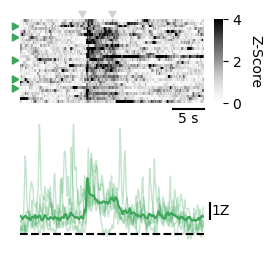

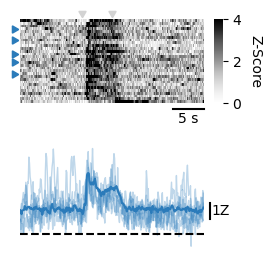

In [32]:
# SVG130 looks like the best
save_figs = True

adlibcolor = "#3DA65A"
deprivedcolor = "#2B7BBA"

snips = snips_dict["SVG130_adlib"]
highlights = [2, 6, 14, 21, 24]

fig_adlib = make_hp_and_traces_fig(snips, highlights, color=adlibcolor)

snips = snips_dict["SVG130_FD"]
highlights = [3, 7, 12, 15, 19]

fig_FD = make_hp_and_traces_fig(snips, highlights, color=deprivedcolor)

if save_figs:
    fig_adlib.savefig(FIGSFOLDER / "SVG130_adlib.pdf", dpi=300)
    fig_FD.savefig(FIGSFOLDER / "SVG130_FD.pdf", dpi=300)



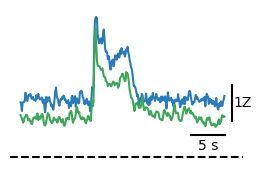

In [33]:
f, ax = plt.subplots(figsize=(3, 2))

ax.plot(np.mean(snips_dict["SVG130_FD"], axis=0), color=deprivedcolor)
ax.plot(np.mean(snips_dict["SVG130_adlib"], axis=0), color=adlibcolor)

ax.set_yticks([])
ax.set_xticks([])

ax.axhline(0, linestyle="--", color="black")

for spines in ["top", "right", "left", "bottom"]:
    ax.spines[spines].set_visible(False)
    
ax.plot((310, 310), (1, 2), color="black", clip_on=False)
ax.text(312, 1.5, "1Z", ha="left", va="center")

ax.plot((250, 300), (0.6, 0.6), color="black", clip_on=False)
ax.text(275, 0.5, "5 s", ha="center", va="top", clip_on=False)

if save_figs:
    f.savefig(FIGSFOLDER / "SVG130_both.pdf", dpi=300)


In [ ]:
highlights_dict = {
    "SVG130_FD": [3, 7, 12, 15, 19],
    "SVG130_adlib": [3, 7, 12, 15, 19],
    "SVG132_FD": [7, 12, 23],
    "SVG132_adlib": [3, 7, 12, 15, 19],
    "SVG134_FD": [7, 12, 23],
    "SVG134_adlib": [3, 7, 12, 15, 19],
    "SVG135_FD": [7, 12, 23],
    "SVG135_adlib": [3, 7, 12, 15, 19],
    "SVG137_FD": [7, 12, 23],
    "SVG137_adlib": [3, 7, 12, 15, 19],
    "SVG139_FD": [7, 12, 23],
    "SVG139_adlib": [3, 7, 12, 15, 19],
}

for rat in rats:
    snips = snips_dict[f"{rat}_FD"]
    highlights = highlights_dict[f"{rat}_FD"]
    f = make_hp_and_traces_fig(snips, highlights, title=f"{rat}_FD")
    
    snips = snips_dict[f"{rat}_adlib"]
    highlights = highlights_dict[f"{rat}_adlib"]
    f2 = make_hp_and_traces_fig(snips, highlights, title=f"{rat}_adlib")
    